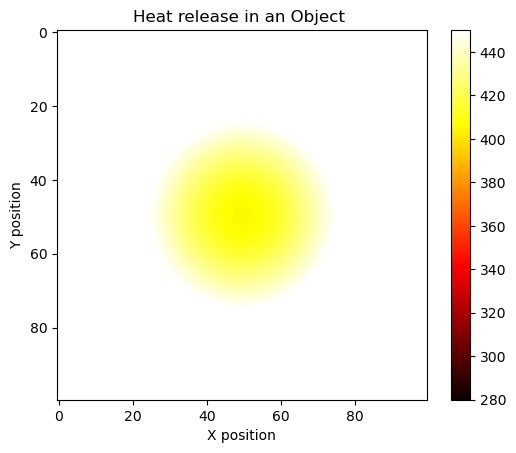

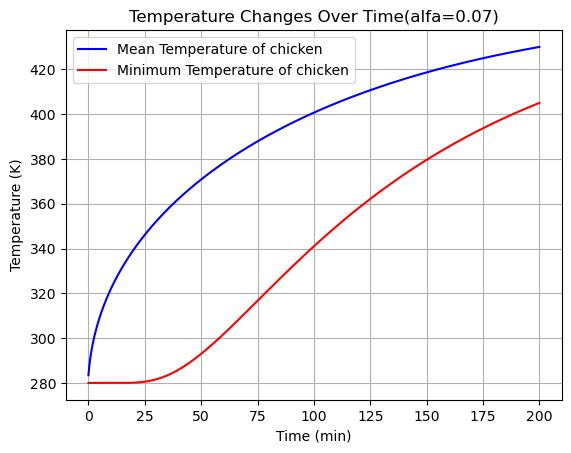

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# پارامترها
L = 10.0          # طول و عرض دامنه (محیط فر)
N = 100           # تعداد نقاط شبکه
dx = L / (N - 1)  # فاصله بین نقاط
alpha = 0.01     # ضریب نفوذ حرارتی
dt = 0.2        # گام زمانی
steps = 1000       # تعداد مراحل زمانی

# ایجاد شبکه دو بعدی
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# شرایط اولیه: دما در سیب‌زمینی 225 کلوین و دما در محیط 300 کلوین
T = np.full((N, N), 450.0)  # دما در تمام نقاط 300 کلوین (فر)
radius = 2.5                # شعاع دایره 
center_x = L / 2            # مرکز دایره در محور x
center_y = L / 2            # مرکز دایره در محور y

# تعیین دما در سیب‌زمینی
for i in range(N):
    for j in range(N):
        if ((X[i, j] - center_x)**2 + (Y[i, j] - center_y)**2) <= radius**2:
            T[i, j] = 280.0  # دما در سیب‌زمینی

# تابع برای به‌روزرسانی دما
def update_temperature(T):
    T_new = T.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            if ((X[i, j] - center_x)**2 + (Y[i, j] - center_y)**2) <= radius**2:
                T_new[i, j] += alpha * dt * (
                    (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                    (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dx**2
                )
    return T_new

# ایجاد انیمیشن
fig, ax = plt.subplots()
cax = ax.imshow(T, cmap='hot', vmin=280, vmax=450)
ax.set_title('Heat release in an Object ')
ax.set_xlabel('X position')
ax.set_ylabel('Y position')

mean_temp = []
min_temp = []

def animate(i):
    global T
    T = update_temperature(T)
    
    mean_temp.append(np.mean(T[T < 450]))  # میانگین دما فقط برای سیب‌زمینی
    min_temp.append(np.min(T[T < 450]))     # حداقل دما فقط برای سیب‌زمینی
    
    cax.set_array(T)
    return cax,

ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50)
plt.colorbar(cax)
ani.save('heat01.gif', writer='pillow', fps=10)

plt.show()

# رسم نمودار میانگین و حداقل دما بر حسب زمان
time_steps = np.arange(0, len(mean_temp) * dt, dt)

plt.figure()
plt.plot(time_steps, mean_temp, label='Mean Temperature of chicken', color='blue')
plt.plot(time_steps, min_temp, label='Minimum Temperature of chicken', color='red')
plt.title('Temperature Changes Over Time(alfa=0.07)')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()

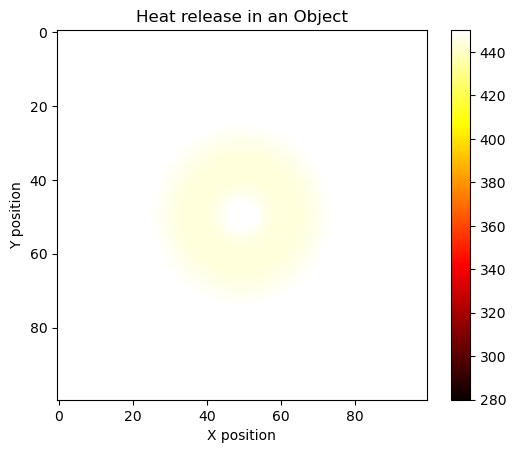

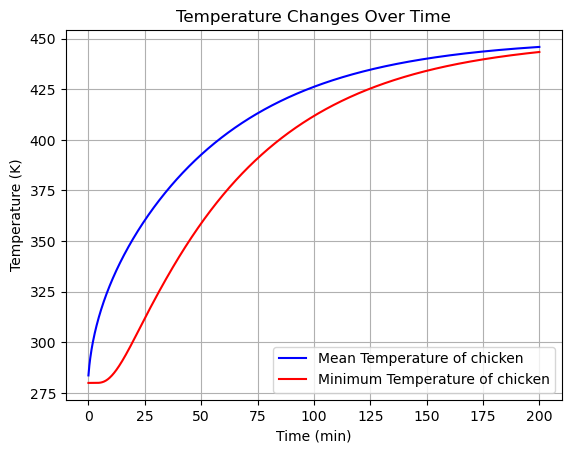

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches


# پارامترها
L = 10.0          # طول و عرض دامنه (محیط فر)
N = 100           # تعداد نقاط شبکه
dx = L / (N - 1)  # فاصله بین نقاط
alpha = 0.009      # ضریب نفوذ حرارتی
dt = 0.2          # گام زمانی
steps = 1000       # تعداد مراحل زمانی

# ایجاد شبکه دو بعدی
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X , Y = np.meshgrid(x, y)

# شرایط اولیه: دما در سیب‌زمینی 225 کلوین و دما در محیط 300 کلوین
T = np.full((N, N), 450.0)  # دما در تمام نقاط 300 کلوین (فر)
radius = 2.5                # شعاع دایره 
center_x = L / 2            # مرکز دایره در محور x
center_y = L / 2            # مرکز دایره در محور y

# تعیین دما در chicken
for i in range(N):
    for j in range(N):
        if ((X[i, j] - center_x)**2 + (Y[i, j] - center_y)**2) <= radius**2:
            T[i, j] = 280.0  # دما در سیب‌زمینی
        if ((X[i, j] - center_x)**2 + (Y[i, j] - center_y)**2) <=(0.03*radius**2):
            T[i, j]=450
# تابع برای به‌روزرسانی دما
def update_temperature(T):
    T_new = T.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            if (0.03*radius**2)<((X[i, j] - center_x)**2 + (Y[i, j] - center_y)**2) <= radius**2:
                T_new[i, j] += alpha * dt * (
                    (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                    (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dx**2
                )
                
    return T_new

# ایجاد انیمیشن
fig, ax = plt.subplots()

cax = ax.imshow(T, cmap='hot', vmin=280, vmax=450)
ax.set_title('Heat release in an Object')
ax.set_xlabel('X position')
ax.set_ylabel('Y position')

mean_temp = []
min_temp = []

def animate(i):
    global T
    T = update_temperature(T)
    
    mean_temp.append(np.mean(T[T < 450]))  # میانگین دما فقط برای سیب‌زمینی
    min_temp.append(np.min(T[T < 450]))     # حداقل دما فقط برای سیب‌زمینی
    
    # تغییر رنگ پس‌زمینه بر اساس دمای فر
    background_color = plt.cm.hot(0.8)  # رنگ پس‌زمینه (نزدیک به دمای فر)
    ax.set_facecolor(background_color)
    
    # تغییر رنگ دایره بر اساس دما
    cax.set_array(T)
    cax.set_clim(280, 450)  # تنظیم محدوده رنگی
    
    return cax,

ani = animation.FuncAnimation(fig, animate, frames=steps, interval=50)
plt.colorbar(cax)
ani.save('heating_potato.gif', writer='pillow', fps=10)

plt.show()

# رسم نمودار میانگین و حداقل دما بر حسب زمان
time_steps = np.arange(0, len(mean_temp) * dt, dt)

plt.figure()
plt.plot(time_steps, mean_temp, label='Mean Temperature of chicken', color='blue')
plt.plot(time_steps, min_temp, label='Minimum Temperature of chicken', color='red')
plt.title('Temperature Changes Over Time')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()